<a href="https://colab.research.google.com/github/kevinliu1126/Pattern_Recognition/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MY WAY

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x= test_images[15]
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 51132214253254253203162 41  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0102142203203253252253252151 70  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0254253244203142102 82  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0172252203  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 21223234 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0122253 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0123254 91 51 51 51 10  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 21223253252253252253172 82  0  0  0  0  

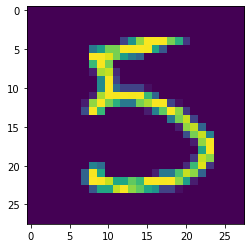

In [ ]:
import matplotlib.pyplot as pl
pl.imshow(x)
pl.imshow(x)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(256,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


In [ ]:
network.compile(
    optimizer = 'Nadam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/ 255

# 建模

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images,train_labels,epochs=16,batch_size=128,validation_split=0.2)

Epoch 1/16
375/375 [==============================] - 2s 5ms/step - loss: 0.2540 - accuracy: 0.9261 - val_loss: 0.1249 - val_accuracy: 0.9612
Epoch 2/16
375/375 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 0.0916 - val_accuracy: 0.9717
Epoch 3/16
375/375 [==============================] - 2s 4ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0848 - val_accuracy: 0.9734
Epoch 4/16
375/375 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0825 - val_accuracy: 0.9765
Epoch 5/16
375/375 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0745 - val_accuracy: 0.9790
Epoch 6/16
375/375 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0933 - val_accuracy: 0.9752
Epoch 7/16
375/375 [==============================] - 2s 4ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0859 - val_accuracy: 0.9787
Epoch 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


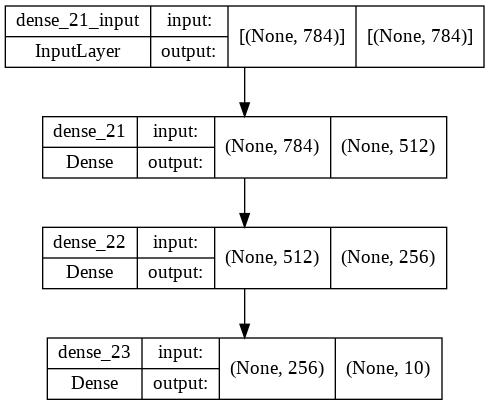

In [ ]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)


In [ ]:
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9816
test_acc: 0.9815999865531921
